# 💼 Task 4: Predicting Insurance Claim Amounts

This task focuses on using **Linear Regression** to estimate medical insurance costs based on personal attributes like age, BMI, smoking status, etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


## 📥 Load Dataset

We are using the **Medical Cost Personal Dataset** from Kaggle.  
Download the `insurance.csv` file and upload it to this notebook.


In [3]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [4]:
# Load the CSV
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🧾 Dataset Overview

Let’s check the shape, data types, and summary of the dataset.


In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
5

## 🔧 Data Preprocessing

We will convert categorical columns (`sex`, `smoker`, `region`) to numeric using One-Hot Encoding.


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 📈 Correlation with Charges

Let’s see which features are most related to the target variable (`charges`).


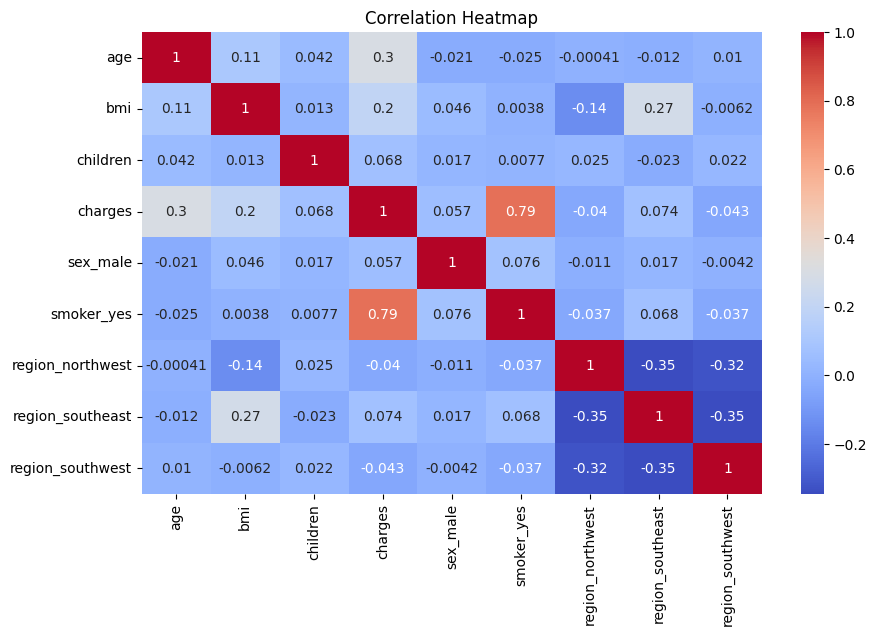

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 📊 Visualizing Key Feature Relationships

We'll visualize how **age**, **BMI**, and **smoking** affect insurance charges.


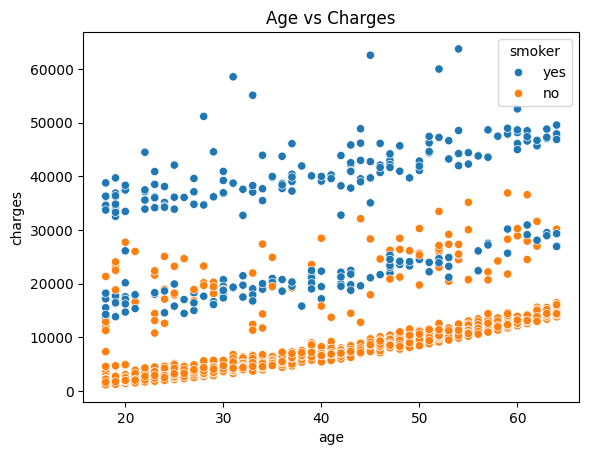

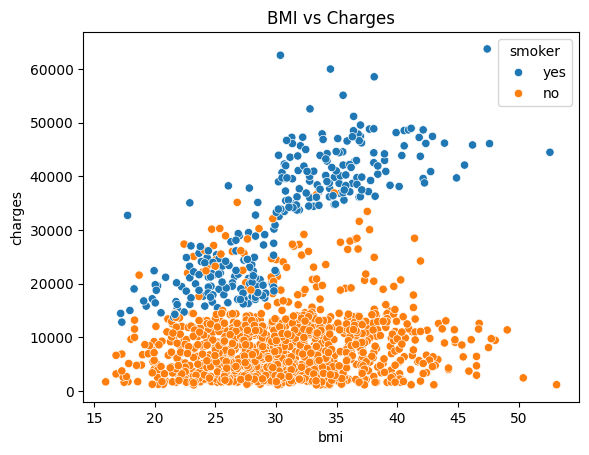

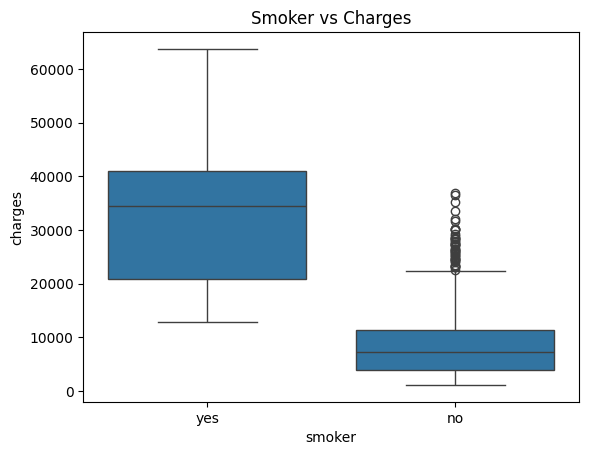

In [8]:
# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges')
plt.show()

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')
plt.show()

# Box Plot for Smoker
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')
plt.show()


## 🤖 Model Training

We’ll use **Linear Regression** to train a model that predicts medical charges.


In [9]:
# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## 📊 Model Evaluation

We’ll use MAE and RMSE to measure how accurate our predictions are.


In [10]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


## ✅ Conclusion

- The model was able to predict insurance charges reasonably well using Linear Regression.
- Smoking status and BMI are strong indicators of high charges.
- More advanced models (like Random Forest) could improve performance further.

This completes **Task 4: Predicting Insurance Claim Amounts** ✅
